# ÏãúÍ∞ÅÌôî ÌÖåÏä§Ìä∏

## 1. DVC VScode Plugin Reversing

ÎèôÏûëÍµ¨Ï°∞ Ïù¥Ìï¥<br>
ÏãúÍ∞ÅÌôî Í∞ÄÎä• Ïó¨Î∂Ä Ï≤¥ÌÅ¨<br>
Ìó§Îìú Îã®ÏúÑ Î≥ÄÌôî Í∞êÏßÄ Î∞è ÏãúÍ∞ÅÌôî ÌëúÌòÑ ÌÖåÏä§Ìä∏

### TSV Ìè¨Îß∑ ÏûëÏÑ± Î∞©Ïãù ÌÖåÏä§Ìä∏

In [1]:
import random
import sys
from dvclive import Live

# Jupyter notebookÏóêÏÑúÎäî sys.argv ÎåÄÏã† ÏßÅÏ†ë Í∞íÏùÑ ÏÑ§Ï†ï
epochs = 10  # ÏõêÌïòÎäî epoch ÏàòÎ°ú Î≥ÄÍ≤Ω

with Live(save_dvc_exp=True) as live:
    live.log_param("epochs", epochs)
    for epoch in range(epochs):
        live.log_metric("train/accuracy", epoch + random.random())
        live.log_metric("train/loss", epochs - epoch - random.random())
        live.log_metric("val/accuracy",epoch + random.random() )
        live.log_metric("val/loss", epochs - epoch - random.random())
        live.next_step()

/Users/bhc/opt/anaconda3/envs/dvc-test/lib/python3.12/site-packages/dvclive/monitor_system.py:11: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  from pynvml import (


> Data Series Îç∞Ïù¥ÌÑ∞Îäî linear plot, confusion matrix, bar plot Ïô∏ ÌëúÌòÑ Î∂àÍ∞Ä.

### Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ± Î∞è Ï∂úÎ†• ÌÖåÏä§Ìä∏

ÏàòÎèôÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÌîåÎ°Ø Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ± ÌõÑ ÌîåÎü¨Í∑∏Ïù∏ÏóêÏÑú Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥Îì§Ïó¨ ÌëúÌòÑÌïòÎäî Î∞©Ïãù

In [10]:
# Îã§ÏñëÌïú Ï∞®Ìä∏ ÌÉÄÏûÖÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ïù¥ÎØ∏ÏßÄÎ°ú Ï†ÄÏû•ÌïòÎäî ÏãúÏä§ÌÖú
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import os
from datetime import datetime

In [ ]:
# Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
plt.style.use('default')
sns.set_palette("husl")

# dvclive/vis_test/ ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±
os.makedirs('dvclive/vis_test', exist_ok=True)

print("üé® Îã§ÏñëÌïú Ï∞®Ìä∏ ÌÉÄÏûÖ ÏÉùÏÑ± ÏãúÏûë...")
print(f"Ï†ÄÏû• ÏúÑÏπò: dvclive/vis_test/")
print(f"ÏÉùÏÑ± ÏãúÍ∞Ñ: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


üé® Îã§ÏñëÌïú Ï∞®Ìä∏ ÌÉÄÏûÖ ÏÉùÏÑ± ÏãúÏûë...
Ï†ÄÏû• ÏúÑÏπò: dvclive/vis_test/
ÏÉùÏÑ± ÏãúÍ∞Ñ: 2025-09-29 16:03:46


In [5]:
# 1. ÎùºÏù∏ ÌîåÎ°Ø (Line Plot)
def create_line_plot():
    """ÏãúÍ≥ÑÏó¥ ÎùºÏù∏ ÌîåÎ°Ø ÏÉùÏÑ±"""
    x = np.linspace(0, 10, 50)
    y1 = np.sin(x) + np.random.normal(0, 0.1, 50)
    y2 = np.cos(x) + np.random.normal(0, 0.1, 50)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, label='Sine Wave', linewidth=2)
    plt.plot(x, y2, label='Cosine Wave', linewidth=2)
    plt.title('Line Plot - Sine and Cosine Waves', fontsize=14, fontweight='bold')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/line_plot.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("‚úÖ ÎùºÏù∏ ÌîåÎ°Ø ÏÉùÏÑ± ÏôÑÎ£å")

# 2. ÏÇ∞Ï†êÎèÑ (Scatter Plot)
def create_scatter_plot():
    """ÏÇ∞Ï†êÎèÑ ÏÉùÏÑ±"""
    n = 100
    x = np.random.normal(5, 2, n)
    y = 2 * x + np.random.normal(0, 3, n)
    colors = np.random.rand(n)
    sizes = np.random.randint(20, 200, n)
    
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(x, y, c=colors, s=sizes, alpha=0.6, cmap='viridis')
    plt.colorbar(scatter, label='Color Values')
    plt.title('Scatter Plot - X vs Y with Color and Size', fontsize=14, fontweight='bold')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/scatter_plot.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("‚úÖ ÏÇ∞Ï†êÎèÑ ÏÉùÏÑ± ÏôÑÎ£å")

# 3. Î∞î Ï∞®Ìä∏ (Bar Chart)
def create_bar_chart():
    """Î∞î Ï∞®Ìä∏ ÏÉùÏÑ±"""
    categories = ['Category A', 'Category B', 'Category C', 'Category D', 'Category E']
    values = [random.uniform(10, 100) for _ in categories]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(categories, values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    plt.title('Bar Chart - Category Performance', fontsize=14, fontweight='bold')
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    
    # Í∞í ÌëúÏãú
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{value:.1f}', ha='center', va='bottom')
    
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/bar_chart.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("‚úÖ Î∞î Ï∞®Ìä∏ ÏÉùÏÑ± ÏôÑÎ£å")

# 4. ÌûàÏä§ÌÜ†Í∑∏Îû® (Histogram)
def create_histogram():
    """ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ±"""
    data1 = np.random.normal(5, 1.5, 1000)
    data2 = np.random.normal(8, 1, 800)
    data3 = np.random.normal(3, 1.2, 600)
    
    plt.figure(figsize=(10, 6))
    plt.hist(data1, bins=30, alpha=0.7, label='Group 1', color='skyblue', edgecolor='black')
    plt.hist(data2, bins=30, alpha=0.7, label='Group 2', color='lightcoral', edgecolor='black')
    plt.hist(data3, bins=30, alpha=0.7, label='Group 3', color='lightgreen', edgecolor='black')
    plt.title('Histogram - Multiple Groups Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/histogram.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("‚úÖ ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ± ÏôÑÎ£å")

# 5. ÌûàÌä∏Îßµ (Heatmap)
def create_heatmap():
    """ÌûàÌä∏Îßµ ÏÉùÏÑ±"""
    data = np.random.rand(10, 12)
    labels_x = [f'X{i}' for i in range(12)]
    labels_y = [f'Y{i}' for i in range(10)]
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(data, annot=True, fmt='.2f', cmap='YlOrRd', 
                xticklabels=labels_x, yticklabels=labels_y,
                cbar_kws={'label': 'Values'})
    plt.title('Heatmap - 2D Data Visualization', fontsize=14, fontweight='bold')
    plt.xlabel('X Labels')
    plt.ylabel('Y Labels')
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/heatmap.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("‚úÖ ÌûàÌä∏Îßµ ÏÉùÏÑ± ÏôÑÎ£å")

# Ï∞®Ìä∏ ÏÉùÏÑ± Ïã§Ìñâ
create_line_plot()
create_scatter_plot()
create_bar_chart()
create_histogram()
create_heatmap()


‚úÖ ÎùºÏù∏ ÌîåÎ°Ø ÏÉùÏÑ± ÏôÑÎ£å
‚úÖ ÏÇ∞Ï†êÎèÑ ÏÉùÏÑ± ÏôÑÎ£å
‚úÖ Î∞î Ï∞®Ìä∏ ÏÉùÏÑ± ÏôÑÎ£å
‚úÖ ÌûàÏä§ÌÜ†Í∑∏Îû® ÏÉùÏÑ± ÏôÑÎ£å
‚úÖ ÌûàÌä∏Îßµ ÏÉùÏÑ± ÏôÑÎ£å


In [11]:
# 6. Î∞ïÏä§ ÌîåÎ°Ø (Box Plot)
def create_box_plot():
    """Î∞ïÏä§ ÌîåÎ°Ø ÏÉùÏÑ±"""
    data = [np.random.normal(5, 1.5, 100) for _ in range(4)]
    labels = ['Group A', 'Group B', 'Group C', 'Group D']
    
    plt.figure(figsize=(10, 6))
    box_plot = plt.boxplot(data, labels=labels, patch_artist=True)
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
    
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    plt.title('Box Plot - Group Distribution Comparison', fontsize=14, fontweight='bold')
    plt.xlabel('Groups')
    plt.ylabel('Values')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/box_plot.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("‚úÖ Î∞ïÏä§ ÌîåÎ°Ø ÏÉùÏÑ± ÏôÑÎ£å")

# 7. ÌååÏù¥ Ï∞®Ìä∏ (Pie Chart)
def create_pie_chart():
    """ÌååÏù¥ Ï∞®Ìä∏ ÏÉùÏÑ±"""
    labels = ['Desktop', 'Mobile', 'Tablet', 'Smart TV', 'Other']
    sizes = [35, 30, 15, 12, 8]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    explode = (0.05, 0, 0, 0, 0)  # Ï≤´ Î≤àÏß∏ Ï°∞Í∞Å Í∞ïÏ°∞
    
    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                                      autopct='%1.1f%%', shadow=True, startangle=90)
    
    # ÌÖçÏä§Ìä∏ Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    plt.title('Pie Chart - Device Usage Distribution', fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/pie_chart.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("‚úÖ ÌååÏù¥ Ï∞®Ìä∏ ÏÉùÏÑ± ÏôÑÎ£å")

# 8. ÏòÅÏó≠ Ï∞®Ìä∏ (Area Chart)
def create_area_chart():
    """ÏòÅÏó≠ Ï∞®Ìä∏ ÏÉùÏÑ±"""
    x = np.linspace(0, 10, 50)
    y1 = np.sin(x) + 2
    y2 = np.cos(x) + 2
    y3 = np.sin(x + np.pi/4) + 2
    
    plt.figure(figsize=(12, 6))
    plt.fill_between(x, 0, y1, alpha=0.7, label='Series 1', color='skyblue')
    plt.fill_between(x, y1, y1 + y2, alpha=0.7, label='Series 2', color='lightcoral')
    plt.fill_between(x, y1 + y2, y1 + y2 + y3, alpha=0.7, label='Series 3', color='lightgreen')
    
    plt.title('Area Chart - Stacked Time Series', fontsize=14, fontweight='bold')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/area_chart.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("‚úÖ ÏòÅÏó≠ Ï∞®Ìä∏ ÏÉùÏÑ± ÏôÑÎ£å")

# 9. Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°Ø (Violin Plot)
def create_violin_plot():
    """Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°Ø ÏÉùÏÑ±"""
    data = [np.random.normal(5, 1.5, 200) for _ in range(4)]
    labels = ['Group A', 'Group B', 'Group C', 'Group D']
    
    plt.figure(figsize=(10, 6))
    parts = plt.violinplot(data, positions=range(1, 5), showmeans=True, showmedians=True)
    
    # ÏÉâÏÉÅ ÏÑ§Ï†ï
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    plt.xticks(range(1, 5), labels)
    plt.title('Violin Plot - Distribution Shape Comparison', fontsize=14, fontweight='bold')
    plt.xlabel('Groups')
    plt.ylabel('Values')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/violin_plot.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("‚úÖ Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°Ø ÏÉùÏÑ± ÏôÑÎ£å")

# 10. ÏÇ∞Ï†êÎèÑ Îß§Ìä∏Î¶≠Ïä§ (Scatter Matrix)
def create_scatter_matrix():
    """ÏÇ∞Ï†êÎèÑ Îß§Ìä∏Î¶≠Ïä§ ÏÉùÏÑ±"""
    n = 200
    data = pd.DataFrame({
        'X1': np.random.normal(5, 2, n),
        'X2': np.random.normal(3, 1.5, n),
        'X3': np.random.normal(7, 1, n),
        'X4': np.random.normal(4, 2.5, n)
    })
    
    plt.figure(figsize=(12, 10))
    pd.plotting.scatter_matrix(data, alpha=0.6, figsize=(12, 10), diagonal='hist')
    plt.suptitle('Scatter Matrix - Multi-dimensional Data', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/scatter_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("‚úÖ ÏÇ∞Ï†êÎèÑ Îß§Ìä∏Î¶≠Ïä§ ÏÉùÏÑ± ÏôÑÎ£å")

# Ï∂îÍ∞Ä Ï∞®Ìä∏Îì§ ÏÉùÏÑ±
create_box_plot()
create_pie_chart()
create_area_chart()
create_violin_plot()
create_scatter_matrix()


/var/folders/9c/d9bwhd_11tqdj2jhtjf0wmh80000gn/T/ipykernel_69760/2593960655.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data, labels=labels, patch_artist=True)


‚úÖ Î∞ïÏä§ ÌîåÎ°Ø ÏÉùÏÑ± ÏôÑÎ£å
‚úÖ ÌååÏù¥ Ï∞®Ìä∏ ÏÉùÏÑ± ÏôÑÎ£å
‚úÖ ÏòÅÏó≠ Ï∞®Ìä∏ ÏÉùÏÑ± ÏôÑÎ£å
‚úÖ Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°Ø ÏÉùÏÑ± ÏôÑÎ£å
‚úÖ ÏÇ∞Ï†êÎèÑ Îß§Ìä∏Î¶≠Ïä§ ÏÉùÏÑ± ÏôÑÎ£å


<Figure size 1200x1000 with 0 Axes>

In [7]:
# 11. Îì±Í≥†ÏÑ† ÌîåÎ°Ø (Contour Plot)
def create_contour_plot():
    """Îì±Í≥†ÏÑ† ÌîåÎ°Ø ÏÉùÏÑ±"""
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.sin(X) * np.cos(Y)
    
    plt.figure(figsize=(10, 8))
    contour = plt.contour(X, Y, Z, levels=20, colors='black', alpha=0.6)
    contourf = plt.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.8)
    plt.colorbar(contourf, label='Z Values')
    plt.title('Contour Plot - 3D Surface Visualization', fontsize=14, fontweight='bold')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/contour_plot.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("‚úÖ Îì±Í≥†ÏÑ† ÌîåÎ°Ø ÏÉùÏÑ± ÏôÑÎ£å")

# 12. 3D ÏÇ∞Ï†êÎèÑ (3D Scatter Plot)
def create_3d_scatter():
    """3D ÏÇ∞Ï†êÎèÑ ÏÉùÏÑ±"""
    from mpl_toolkits.mplot3d import Axes3D
    
    n = 100
    x = np.random.normal(5, 2, n)
    y = np.random.normal(3, 1.5, n)
    z = np.random.normal(7, 1, n)
    colors = np.random.rand(n)
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, c=colors, cmap='viridis', s=50, alpha=0.6)
    ax.set_xlabel('X Values')
    ax.set_ylabel('Y Values')
    ax.set_zlabel('Z Values')
    ax.set_title('3D Scatter Plot - Multi-dimensional Data', fontsize=14, fontweight='bold')
    plt.colorbar(scatter, label='Color Values')
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/3d_scatter.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("‚úÖ 3D ÏÇ∞Ï†êÎèÑ ÏÉùÏÑ± ÏôÑÎ£å")

# 13. Î†àÏù¥Îçî Ï∞®Ìä∏ (Radar Chart)
def create_radar_chart():
    """Î†àÏù¥Îçî Ï∞®Ìä∏ ÏÉùÏÑ±"""
    categories = ['Speed', 'Accuracy', 'Reliability', 'Ease of Use', 'Cost', 'Support']
    values1 = [8, 7, 9, 6, 7, 8]
    values2 = [6, 8, 7, 9, 8, 7]
    
    # Í∞ÅÎèÑ Í≥ÑÏÇ∞
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    values1 += values1[:1]  # Îã´Ìûå Îã§Í∞ÅÌòïÏùÑ ÏúÑÌï¥ Ï≤´ Î≤àÏß∏ Í∞í Ï∂îÍ∞Ä
    values2 += values2[:1]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    ax.plot(angles, values1, 'o-', linewidth=2, label='Product A', color='blue')
    ax.fill(angles, values1, alpha=0.25, color='blue')
    ax.plot(angles, values2, 'o-', linewidth=2, label='Product B', color='red')
    ax.fill(angles, values2, alpha=0.25, color='red')
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_ylim(0, 10)
    ax.set_title('Radar Chart - Product Comparison', fontsize=14, fontweight='bold', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    ax.grid(True)
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/radar_chart.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("‚úÖ Î†àÏù¥Îçî Ï∞®Ìä∏ ÏÉùÏÑ± ÏôÑÎ£å")

# 14. Ìä∏Î¶¨Îßµ (Treemap)
def create_treemap():
    """Ìä∏Î¶¨Îßµ ÏÉùÏÑ±"""
    import squarify
    
    sizes = [40, 30, 20, 10]
    labels = ['Category A', 'Category B', 'Category C', 'Category D']
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
    
    plt.figure(figsize=(10, 8))
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)
    plt.title('Treemap - Hierarchical Data Visualization', fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/treemap.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("‚úÖ Ìä∏Î¶¨Îßµ ÏÉùÏÑ± ÏôÑÎ£å")

# 15. ÏÇ∞Ï†êÎèÑ Î≤ÑÎ∏î Ï∞®Ìä∏ (Bubble Chart)
def create_bubble_chart():
    """Î≤ÑÎ∏î Ï∞®Ìä∏ ÏÉùÏÑ±"""
    n = 50
    x = np.random.normal(5, 2, n)
    y = np.random.normal(3, 1.5, n)
    sizes = np.random.randint(20, 300, n)
    colors = np.random.rand(n)
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(x, y, s=sizes, c=colors, alpha=0.6, cmap='plasma')
    plt.colorbar(scatter, label='Color Values')
    plt.title('Bubble Chart - X vs Y with Size and Color', fontsize=14, fontweight='bold')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/bubble_chart.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("‚úÖ Î≤ÑÎ∏î Ï∞®Ìä∏ ÏÉùÏÑ± ÏôÑÎ£å")

# Í≥†Í∏â Ï∞®Ìä∏Îì§ ÏÉùÏÑ±
create_contour_plot()
create_3d_scatter()
create_radar_chart()
create_treemap()
create_bubble_chart()


‚úÖ Îì±Í≥†ÏÑ† ÌîåÎ°Ø ÏÉùÏÑ± ÏôÑÎ£å
‚úÖ 3D ÏÇ∞Ï†êÎèÑ ÏÉùÏÑ± ÏôÑÎ£å
‚úÖ Î†àÏù¥Îçî Ï∞®Ìä∏ ÏÉùÏÑ± ÏôÑÎ£å
‚úÖ Ìä∏Î¶¨Îßµ ÏÉùÏÑ± ÏôÑÎ£å
‚úÖ Î≤ÑÎ∏î Ï∞®Ìä∏ ÏÉùÏÑ± ÏôÑÎ£å


In [12]:
# ÏÉùÏÑ±Îêú Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎì§ ÌôïÏù∏ Î∞è ÏöîÏïΩ
import os
import glob

def check_generated_charts():
    """ÏÉùÏÑ±Îêú Ï∞®Ìä∏ Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎì§ÏùÑ ÌôïÏù∏ÌïòÍ≥† ÏöîÏïΩ"""
    
    vis_test_dir = "dvclive/vis_test"
    
    if os.path.exists(vis_test_dir):
        # PNG ÌååÏùºÎì§ Ï∞æÍ∏∞
        png_files = glob.glob(os.path.join(vis_test_dir, "*.png"))
        
        print(f"\nüìä ÏÉùÏÑ±Îêú Ï∞®Ìä∏ Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎì§ ({len(png_files)}Í∞ú):")
        print("=" * 60)
        
        for i, file_path in enumerate(sorted(png_files), 1):
            file_name = os.path.basename(file_path)
            file_size = os.path.getsize(file_path)
            file_size_mb = file_size / (1024 * 1024)
            print(f"{i:2d}. {file_name:<25} ({file_size_mb:.2f} MB)")
        
        print("=" * 60)
        print(f"Ï¥ù ÌååÏùº ÌÅ¨Í∏∞: {sum(os.path.getsize(f) for f in png_files) / (1024 * 1024):.2f} MB")
        
        # Ï∞®Ìä∏ ÌÉÄÏûÖÎ≥Ñ Î∂ÑÎ•ò
        chart_types = {
            "Í∏∞Î≥∏ Ï∞®Ìä∏": ["line_plot", "scatter_plot", "bar_chart", "histogram", "heatmap"],
            "Î∂ÑÌè¨ Ï∞®Ìä∏": ["box_plot", "violin_plot"],
            "ÎπÑÏú® Ï∞®Ìä∏": ["pie_chart", "area_chart"],
            "Í≥†Í∏â Ï∞®Ìä∏": ["scatter_matrix", "contour_plot", "3d_scatter", "radar_chart", "treemap", "bubble_chart"]
        }
        
        print(f"\nüìà Ï∞®Ìä∏ ÌÉÄÏûÖÎ≥Ñ Î∂ÑÎ•ò:")
        for category, charts in chart_types.items():
            print(f"\n{category}:")
            for chart in charts:
                if f"{chart}.png" in [os.path.basename(f) for f in png_files]:
                    print(f"  ‚úÖ {chart.replace('_', ' ').title()}")
                else:
                    print(f"  ‚ùå {chart.replace('_', ' ').title()}")
    
    else:
        print("‚ùå dvclive/vis_test ÎîîÎ†âÌÜ†Î¶¨Í∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")

# ÏÉùÏÑ±Îêú Ï∞®Ìä∏Îì§ ÌôïÏù∏
check_generated_charts()



üìä ÏÉùÏÑ±Îêú Ï∞®Ìä∏ Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎì§ (15Í∞ú):
 1. 3d_scatter.png            (0.66 MB)
 2. area_chart.png            (0.24 MB)
 3. bar_chart.png             (0.10 MB)
 4. box_plot.png              (0.07 MB)
 5. bubble_chart.png          (0.23 MB)
 6. contour_plot.png          (1.04 MB)
 7. heatmap.png               (0.38 MB)
 8. histogram.png             (0.09 MB)
 9. line_plot.png             (0.23 MB)
10. pie_chart.png             (0.25 MB)
11. radar_chart.png           (0.45 MB)
12. scatter_matrix.png        (0.63 MB)
13. scatter_plot.png          (0.29 MB)
14. treemap.png               (0.07 MB)
15. violin_plot.png           (0.12 MB)
Ï¥ù ÌååÏùº ÌÅ¨Í∏∞: 4.86 MB

üìà Ï∞®Ìä∏ ÌÉÄÏûÖÎ≥Ñ Î∂ÑÎ•ò:

Í∏∞Î≥∏ Ï∞®Ìä∏:
  ‚úÖ Line Plot
  ‚úÖ Scatter Plot
  ‚úÖ Bar Chart
  ‚úÖ Histogram
  ‚úÖ Heatmap

Î∂ÑÌè¨ Ï∞®Ìä∏:
  ‚úÖ Box Plot
  ‚úÖ Violin Plot

ÎπÑÏú® Ï∞®Ìä∏:
  ‚úÖ Pie Chart
  ‚úÖ Area Chart

Í≥†Í∏â Ï∞®Ìä∏:
  ‚úÖ Scatter Matrix
  ‚úÖ Contour Plot
  ‚úÖ 3D Scatter
  ‚úÖ Radar Chart
  ‚ú

In [9]:
# DVCÍ∞Ä Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎì§ÏùÑ Ïù∏ÏãùÌï† Ïàò ÏûàÎèÑÎ°ù dvc.yaml ÌååÏùº ÏÉùÏÑ±
def create_dvc_yaml_for_images():
    """ÏÉùÏÑ±Îêú Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎì§ÏùÑ DVCÍ∞Ä Ïù∏ÏãùÌï† Ïàò ÏûàÎèÑÎ°ù dvc.yaml ÌååÏùº ÏÉùÏÑ±"""
    
    yaml_content = """params:
- dvclive/params.yaml
metrics:
- dvclive/metrics.json
plots:
# ÏÉùÏÑ±Îêú Ï∞®Ìä∏ Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ DVC plotsÎ°ú ÏÑ§Ï†ï
# Í∏∞Î≥∏ Ï∞®Ìä∏Îì§
- dvclive/vis_test/line_plot.png:
    title: "Line Plot - Sine and Cosine Waves"
- dvclive/vis_test/scatter_plot.png:
    title: "Scatter Plot - X vs Y with Color and Size"
- dvclive/vis_test/bar_chart.png:
    title: "Bar Chart - Category Performance"
- dvclive/vis_test/histogram.png:
    title: "Histogram - Multiple Groups Distribution"
- dvclive/vis_test/heatmap.png:
    title: "Heatmap - 2D Data Visualization"

# Î∂ÑÌè¨ Ï∞®Ìä∏Îì§
- dvclive/vis_test/box_plot.png:
    title: "Box Plot - Group Distribution Comparison"
- dvclive/vis_test/violin_plot.png:
    title: "Violin Plot - Distribution Shape Comparison"

# ÎπÑÏú® Ï∞®Ìä∏Îì§
- dvclive/vis_test/pie_chart.png:
    title: "Pie Chart - Device Usage Distribution"
- dvclive/vis_test/area_chart.png:
    title: "Area Chart - Stacked Time Series"

# Í≥†Í∏â Ï∞®Ìä∏Îì§
- dvclive/vis_test/scatter_matrix.png:
    title: "Scatter Matrix - Multi-dimensional Data"
- dvclive/vis_test/contour_plot.png:
    title: "Contour Plot - 3D Surface Visualization"
- dvclive/vis_test/3d_scatter.png:
    title: "3D Scatter Plot - Multi-dimensional Data"
- dvclive/vis_test/radar_chart.png:
    title: "Radar Chart - Product Comparison"
- dvclive/vis_test/treemap.png:
    title: "Treemap - Hierarchical Data Visualization"
- dvclive/vis_test/bubble_chart.png:
    title: "Bubble Chart - X vs Y with Size and Color"

# Í∏∞Ï°¥ dvclive Î©îÌä∏Î¶≠
- dvclive/plots/metrics:
    x: step
"""
    
    with open('dvc.yaml', 'w') as f:
        f.write(yaml_content)
    
    print("‚úÖ dvc.yaml ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å!")
    print("üìÅ ÏÉùÏÑ±Îêú Ï∞®Ìä∏ Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ DVC plotsÎ°ú ÏÑ§Ï†ïÌñàÏäµÎãàÎã§.")
    print("üéØ VSCode DVC ÌîåÎü¨Í∑∏Ïù∏ÏóêÏÑú Î™®Îì† Ï∞®Ìä∏Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.")

# DVC YAML ÌååÏùº ÏÉùÏÑ±
create_dvc_yaml_for_images()


‚úÖ dvc.yaml ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å!
üìÅ ÏÉùÏÑ±Îêú Ï∞®Ìä∏ Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ DVC plotsÎ°ú ÏÑ§Ï†ïÌñàÏäµÎãàÎã§.
üéØ VSCode DVC ÌîåÎü¨Í∑∏Ïù∏ÏóêÏÑú Î™®Îì† Ï∞®Ìä∏Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.


In [10]:
# ÏµúÏ¢Ö ÏöîÏïΩ Î∞è ÏÇ¨Ïö© Î∞©Î≤ï ÏïàÎÇ¥
print("üéâ Î™®Îì† Ï∞®Ìä∏ ÏÉùÏÑ± Î∞è DVC ÏÑ§Ï†ï ÏôÑÎ£å!")
print("=" * 80)

print("\nüìä ÏÉùÏÑ±Îêú Ï∞®Ìä∏ ÌÉÄÏûÖÎì§:")
print("1. Í∏∞Î≥∏ Ï∞®Ìä∏ (5Í∞ú):")
print("   - ÎùºÏù∏ ÌîåÎ°Ø (Line Plot)")
print("   - ÏÇ∞Ï†êÎèÑ (Scatter Plot)")
print("   - Î∞î Ï∞®Ìä∏ (Bar Chart)")
print("   - ÌûàÏä§ÌÜ†Í∑∏Îû® (Histogram)")
print("   - ÌûàÌä∏Îßµ (Heatmap)")

print("\n2. Î∂ÑÌè¨ Ï∞®Ìä∏ (2Í∞ú):")
print("   - Î∞ïÏä§ ÌîåÎ°Ø (Box Plot)")
print("   - Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°Ø (Violin Plot)")

print("\n3. ÎπÑÏú® Ï∞®Ìä∏ (2Í∞ú):")
print("   - ÌååÏù¥ Ï∞®Ìä∏ (Pie Chart)")
print("   - ÏòÅÏó≠ Ï∞®Ìä∏ (Area Chart)")

print("\n4. Í≥†Í∏â Ï∞®Ìä∏ (6Í∞ú):")
print("   - ÏÇ∞Ï†êÎèÑ Îß§Ìä∏Î¶≠Ïä§ (Scatter Matrix)")
print("   - Îì±Í≥†ÏÑ† ÌîåÎ°Ø (Contour Plot)")
print("   - 3D ÏÇ∞Ï†êÎèÑ (3D Scatter Plot)")
print("   - Î†àÏù¥Îçî Ï∞®Ìä∏ (Radar Chart)")
print("   - Ìä∏Î¶¨Îßµ (Treemap)")
print("   - Î≤ÑÎ∏î Ï∞®Ìä∏ (Bubble Chart)")

print("\nüìÅ ÌååÏùº ÏúÑÏπò:")
print("   - Ï∞®Ìä∏ Ïù¥ÎØ∏ÏßÄ: dvclive/vis_test/*.png")
print("   - DVC ÏÑ§Ï†ï: dvc.yaml")

print("\nüéØ ÏÇ¨Ïö© Î∞©Î≤ï:")
print("1. VSCodeÏóêÏÑú DVC ÌîåÎü¨Í∑∏Ïù∏ ÏÑ§Ïπò Î∞è ÌôúÏÑ±Ìôî")
print("2. DVC Plots Ìå®ÎÑêÏóêÏÑú Î™®Îì† Ï∞®Ìä∏ ÌôïÏù∏")
print("3. Í∞Å Ï∞®Ìä∏Îäî Í≥†Ìï¥ÏÉÅÎèÑ PNG Ïù¥ÎØ∏ÏßÄÎ°ú Ï†ÄÏû•Îê®")
print("4. Î¨¥ÏûëÏúÑ Îç∞Ïù¥ÌÑ∞Î°ú Íµ¨ÏÑ±ÎêòÏñ¥ Ïã§Ï†ú ÏÇ¨Ïö© ÏãúÎÇòÎ¶¨Ïò§ÏôÄ Ïú†ÏÇ¨")

print("\n‚ú® ÌäπÏßï:")
print("- Ï¥ù 15Í∞ÄÏßÄ Îã§ÏñëÌïú Ï∞®Ìä∏ ÌÉÄÏûÖ")
print("- Í≥†Ìï¥ÏÉÅÎèÑ (300 DPI) Ïù¥ÎØ∏ÏßÄ")
print("- Î¨¥ÏûëÏúÑ Îç∞Ïù¥ÌÑ∞Î°ú ÌòÑÏã§Ï†ÅÏù∏ Ìå®ÌÑ¥")
print("- DVC VSCode ÌîåÎü¨Í∑∏Ïù∏Í≥º ÏôÑÎ≤Ω Ìò∏Ìôò")
print("- Í∞Å Ï∞®Ìä∏Î≥Ñ Ï†úÎ™©Í≥º ÏÑ§Î™Ö Ìè¨Ìï®")

print("\n" + "=" * 80)
print("üöÄ Ïù¥Ï†ú VSCode DVC ÌîåÎü¨Í∑∏Ïù∏ÏóêÏÑú Î™®Îì† Ï∞®Ìä∏Î•º ÌôïÏù∏Ìï¥Î≥¥ÏÑ∏Ïöî!")


üéâ Î™®Îì† Ï∞®Ìä∏ ÏÉùÏÑ± Î∞è DVC ÏÑ§Ï†ï ÏôÑÎ£å!

üìä ÏÉùÏÑ±Îêú Ï∞®Ìä∏ ÌÉÄÏûÖÎì§:
1. Í∏∞Î≥∏ Ï∞®Ìä∏ (5Í∞ú):
   - ÎùºÏù∏ ÌîåÎ°Ø (Line Plot)
   - ÏÇ∞Ï†êÎèÑ (Scatter Plot)
   - Î∞î Ï∞®Ìä∏ (Bar Chart)
   - ÌûàÏä§ÌÜ†Í∑∏Îû® (Histogram)
   - ÌûàÌä∏Îßµ (Heatmap)

2. Î∂ÑÌè¨ Ï∞®Ìä∏ (2Í∞ú):
   - Î∞ïÏä§ ÌîåÎ°Ø (Box Plot)
   - Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°Ø (Violin Plot)

3. ÎπÑÏú® Ï∞®Ìä∏ (2Í∞ú):
   - ÌååÏù¥ Ï∞®Ìä∏ (Pie Chart)
   - ÏòÅÏó≠ Ï∞®Ìä∏ (Area Chart)

4. Í≥†Í∏â Ï∞®Ìä∏ (6Í∞ú):
   - ÏÇ∞Ï†êÎèÑ Îß§Ìä∏Î¶≠Ïä§ (Scatter Matrix)
   - Îì±Í≥†ÏÑ† ÌîåÎ°Ø (Contour Plot)
   - 3D ÏÇ∞Ï†êÎèÑ (3D Scatter Plot)
   - Î†àÏù¥Îçî Ï∞®Ìä∏ (Radar Chart)
   - Ìä∏Î¶¨Îßµ (Treemap)
   - Î≤ÑÎ∏î Ï∞®Ìä∏ (Bubble Chart)

üìÅ ÌååÏùº ÏúÑÏπò:
   - Ï∞®Ìä∏ Ïù¥ÎØ∏ÏßÄ: dvclive/vis_test/*.png
   - DVC ÏÑ§Ï†ï: dvc.yaml

üéØ ÏÇ¨Ïö© Î∞©Î≤ï:
1. VSCodeÏóêÏÑú DVC ÌîåÎü¨Í∑∏Ïù∏ ÏÑ§Ïπò Î∞è ÌôúÏÑ±Ìôî
2. DVC Plots Ìå®ÎÑêÏóêÏÑú Î™®Îì† Ï∞®Ìä∏ ÌôïÏù∏
3. Í∞Å Ï∞®Ìä∏Îäî Í≥†Ìï¥ÏÉÅÎèÑ PNG Ïù¥ÎØ∏ÏßÄÎ°ú Ï†ÄÏû•Îê®
4. Î¨¥ÏûëÏúÑ Îç∞Ïù¥ÌÑ∞Î°ú Íµ¨ÏÑ±ÎêòÏñ¥ Ïã§Ï†ú ÏÇ¨Ï

## 2. Ï∫êÏãú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî


In [1]:
# Ïã§Ï†ú Ï∫êÏãú Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÏãúÍ∞ÅÌôî
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import os

cache_dir = Path("../datasets/test_data/cache")
os.makedirs('dvclive/cache_viz', exist_ok=True)

print("üì¶ Ïã§Ï†ú Ï∫êÏãú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÏãúÏûë")
print("=" * 80)

üì¶ Ïã§Ï†ú Ï∫êÏãú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÏãúÏûë


In [6]:
# 1. Attribute Analysis Ï∫êÏãú Î°úÎìú
with open(cache_dir / 'analysis_attribute_analysis_test_data.cache', 'rb') as f:
    attr_data = pickle.load(f)

print(f"‚úÖ Attribute Îç∞Ïù¥ÌÑ∞ Î°úÎìú: {len(attr_data)}Í∞ú ÌååÏùº")
print(f"ÏÉòÌîå ÌååÏùº: {list(attr_data.keys())[:3]}")

# Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
sizes = [v['size'] for v in attr_data.values()]
formats = [v['format'] for v in attr_data.values()]
widths = [v['width'] for v in attr_data.values()]
heights = [v['height'] for v in attr_data.values()]
noise_levels = [v['noise_level'] for v in attr_data.values()]
sharpness = [v['sharpness'] for v in attr_data.values()]

print(f"\nüìä Ï∂îÏ∂úÎêú ÏÜçÏÑ±:")
print(f"  - ÌååÏùº ÌÅ¨Í∏∞ Î≤îÏúÑ: {min(sizes):.2f} ~ {max(sizes):.2f} MB")
print(f"  - ÌååÏùº ÌòïÏãù: {set(formats)}")
print(f"  - Ìï¥ÏÉÅÎèÑ Î≤îÏúÑ: {min(widths)}x{min(heights)} ~ {max(widths)}x{max(heights)}")
print(f"  - ÎÖ∏Ïù¥Ï¶à Î†àÎ≤® Î≤îÏúÑ: {min(noise_levels):.2f} ~ {max(noise_levels):.2f}")
print(f"  - ÏÑ†Î™ÖÎèÑ Î≤îÏúÑ: {min(sharpness):.2f} ~ {max(sharpness):.2f}")

‚úÖ Attribute Îç∞Ïù¥ÌÑ∞ Î°úÎìú: 15Í∞ú ÌååÏùº
ÏÉòÌîå ÌååÏùº: ['IMG_3194.jpeg', 'jpark1.jpg', 'IMG_3146.jpeg']

üìä Ï∂îÏ∂úÎêú ÏÜçÏÑ±:
  - ÌååÏùº ÌÅ¨Í∏∞ Î≤îÏúÑ: 0.03 ~ 3.29 MB
  - ÌååÏùº ÌòïÏãù: {'PNG', 'JPEG'}
  - Ìï¥ÏÉÅÎèÑ Î≤îÏúÑ: 256x256 ~ 4032x3024
  - ÎÖ∏Ïù¥Ï¶à Î†àÎ≤® Î≤îÏúÑ: 0.11 ~ 0.48
  - ÏÑ†Î™ÖÎèÑ Î≤îÏúÑ: 0.01 ~ 0.10


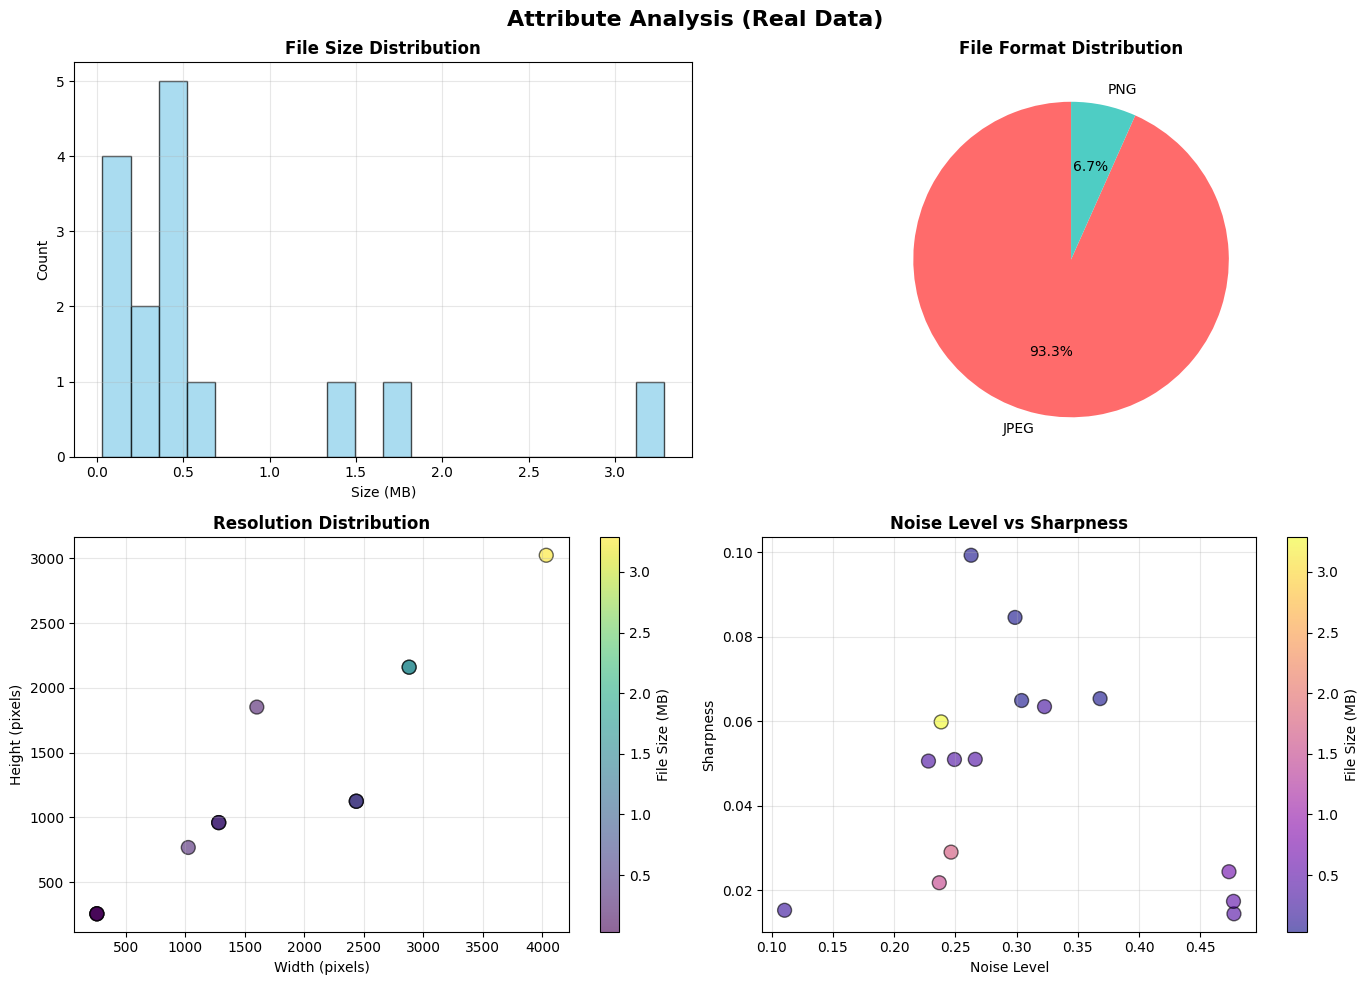

In [8]:
from collections import Counter

# 1-1. ÌååÏùº ÌÅ¨Í∏∞ Î∂ÑÌè¨
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ÌååÏùº ÌÅ¨Í∏∞ ÌûàÏä§ÌÜ†Í∑∏Îû®
axes[0, 0].hist(sizes, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('File Size Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Size (MB)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(alpha=0.3)

# ÌååÏùº ÌòïÏãù ÌååÏù¥ Ï∞®Ìä∏
format_counts = Counter(formats)
axes[0, 1].pie(format_counts.values(), labels=format_counts.keys(), autopct='%1.1f%%', 
               startangle=90, colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0, 1].set_title('File Format Distribution', fontsize=12, fontweight='bold')

# Ìï¥ÏÉÅÎèÑ ÏÇ∞Ï†êÎèÑ
scatter = axes[1, 0].scatter(widths, heights, alpha=0.6, s=100, c=sizes, cmap='viridis', edgecolors='black')
axes[1, 0].set_title('Resolution Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Width (pixels)')
axes[1, 0].set_ylabel('Height (pixels)')
axes[1, 0].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 0], label='File Size (MB)')

# ÎÖ∏Ïù¥Ï¶à vs ÏÑ†Î™ÖÎèÑ
scatter2 = axes[1, 1].scatter(noise_levels, sharpness, alpha=0.6, s=100, c=sizes, cmap='plasma', edgecolors='black')
axes[1, 1].set_title('Noise Level vs Sharpness', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Noise Level')
axes[1, 1].set_ylabel('Sharpness')
axes[1, 1].grid(alpha=0.3)
plt.colorbar(scatter2, ax=axes[1, 1], label='File Size (MB)')

plt.suptitle('Attribute Analysis (Real Data)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

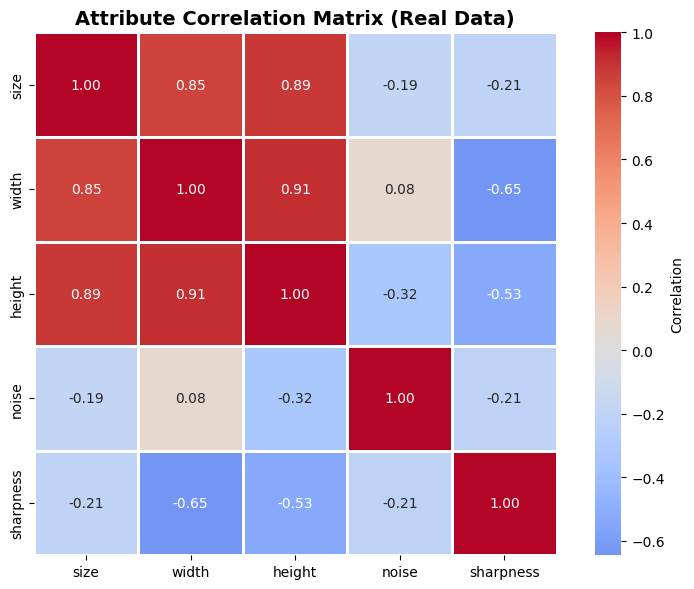


üìä ÏÜçÏÑ± ÌÜµÍ≥Ñ:
            size        width       height      noise  sharpness
count  15.000000    15.000000    15.000000  15.000000  15.000000
mean    0.662711  1639.200000  1149.533333   0.303982   0.047519
std     0.881117  1168.924487   823.664275   0.105081   0.026327
min     0.032442   256.000000   256.000000   0.110561   0.014457
25%     0.135487   640.000000   512.000000   0.242414   0.023114
50%     0.391706  1280.000000   960.000000   0.266204   0.050988
75%     0.580322  2436.000000  1488.500000   0.345418   0.064227
max     3.285650  4032.000000  3024.000000   0.477373   0.099346


In [11]:
# 1-2. ÏÜçÏÑ± ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
attr_df = pd.DataFrame({
    'size': sizes,
    'width': widths,
    'height': heights,
    'noise': noise_levels,
    'sharpness': sharpness
})
corr = attr_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('Attribute Correlation Matrix (Real Data)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nüìä ÏÜçÏÑ± ÌÜµÍ≥Ñ:")
print(attr_df.describe())

‚úÖ Embedding Îç∞Ïù¥ÌÑ∞ Î°úÎìú: <class 'dict'>
ÏûÑÎ≤†Îî© shape: (15, 512)
ÌååÏùº Ïàò: 15
PCA explained variance: [0.23717031 0.16610832]
Total variance: 40.3%


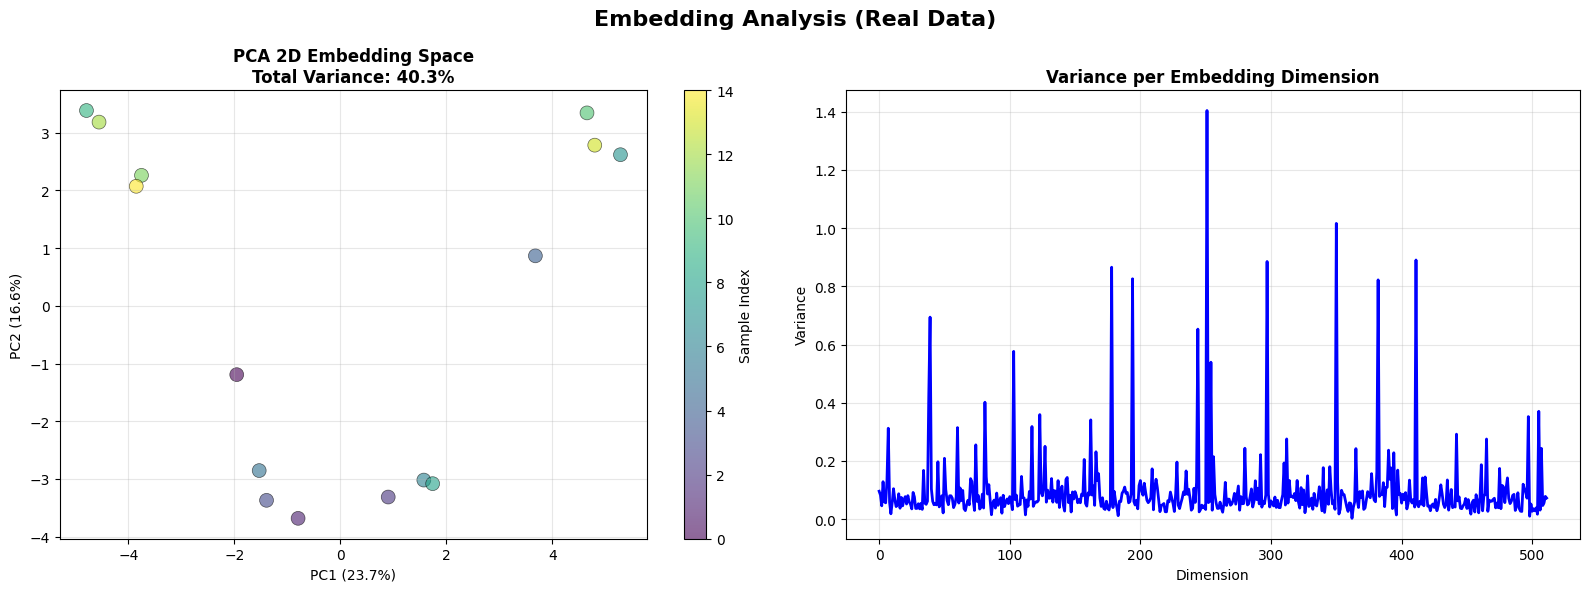

‚úÖ Embedding Î∂ÑÏÑù ÏôÑÎ£å


In [13]:
# 2. Embedding Analysis (datadrift_app_engine Î∞©Ïãù Ï∞∏Í≥†)
with open(cache_dir / 'analysis_embedding_analysis_test_data.cache', 'rb') as f:
    emb_data = pickle.load(f)

print(f"‚úÖ Embedding Îç∞Ïù¥ÌÑ∞ Î°úÎìú: {type(emb_data)}")

if isinstance(emb_data, dict) and len(emb_data) > 0:
    # ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ Ï∂îÏ∂ú
    embeddings = []
    filenames = []
    
    for fname, emb_value in emb_data.items():
        # Ï∫êÏãú Íµ¨Ï°∞ ÌôïÏù∏: dict ÎòêÎäî ÏßÅÏ†ë ndarray
        if isinstance(emb_value, dict) and 'embedding' in emb_value:
            emb = np.array(emb_value['embedding'])
        elif isinstance(emb_value, np.ndarray):
            emb = emb_value
        elif isinstance(emb_value, list):
            emb = np.array(emb_value)
        else:
            continue
            
        embeddings.append(emb)
        filenames.append(fname)
    
    embeddings = np.array(embeddings)
    print(f"ÏûÑÎ≤†Îî© shape: {embeddings.shape}")
    print(f"ÌååÏùº Ïàò: {len(filenames)}")
    
    # PCAÎ•º ÏÇ¨Ïö©Ìïú Ï∞®Ïõê Ï∂ïÏÜå (datadrift_app_engine Î∞©Ïãù)
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)
    
    print(f"PCA explained variance: {pca.explained_variance_ratio_}")
    print(f"Total variance: {pca.explained_variance_ratio_.sum():.1%}")
    
    # ÏãúÍ∞ÅÌôî
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # PCA 2D ÏãúÍ∞ÅÌôî
    scatter1 = axes[0].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], 
                              alpha=0.6, s=100, c=range(len(embeddings_2d)), 
                              cmap='viridis', edgecolors='black', linewidth=0.5)
    axes[0].set_title(f'PCA 2D Embedding Space\nTotal Variance: {pca.explained_variance_ratio_.sum():.1%}', 
                     fontsize=12, fontweight='bold')
    axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    axes[0].grid(alpha=0.3)
    plt.colorbar(scatter1, ax=axes[0], label='Sample Index')
    
    # Ï∞®ÏõêÎ≥Ñ Î∂ÑÏÇ∞
    variances = np.var(embeddings, axis=0)
    axes[1].plot(variances, linewidth=2, color='blue')
    axes[1].set_title('Variance per Embedding Dimension', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Dimension')
    axes[1].set_ylabel('Variance')
    axes[1].grid(alpha=0.3)
    
    plt.suptitle('Embedding Analysis (Real Data)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("‚úÖ Embedding Î∂ÑÏÑù ÏôÑÎ£å")

‚úÖ Clustering Îç∞Ïù¥ÌÑ∞ Î°úÎìú: <class 'dict'>
ÌÇ§: ['method', 'n_clusters', 'cluster_labels', 'file_names', 'file_paths', 'embeddings_2d', 'pca_components', 'pca_explained_variance_ratio', 'cluster_stats', 'centroids', 'centroids_high_dim', 'centroid_similarities', '_embedding_hash']
ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: 3
ÏÉòÌîå Ïàò: 15


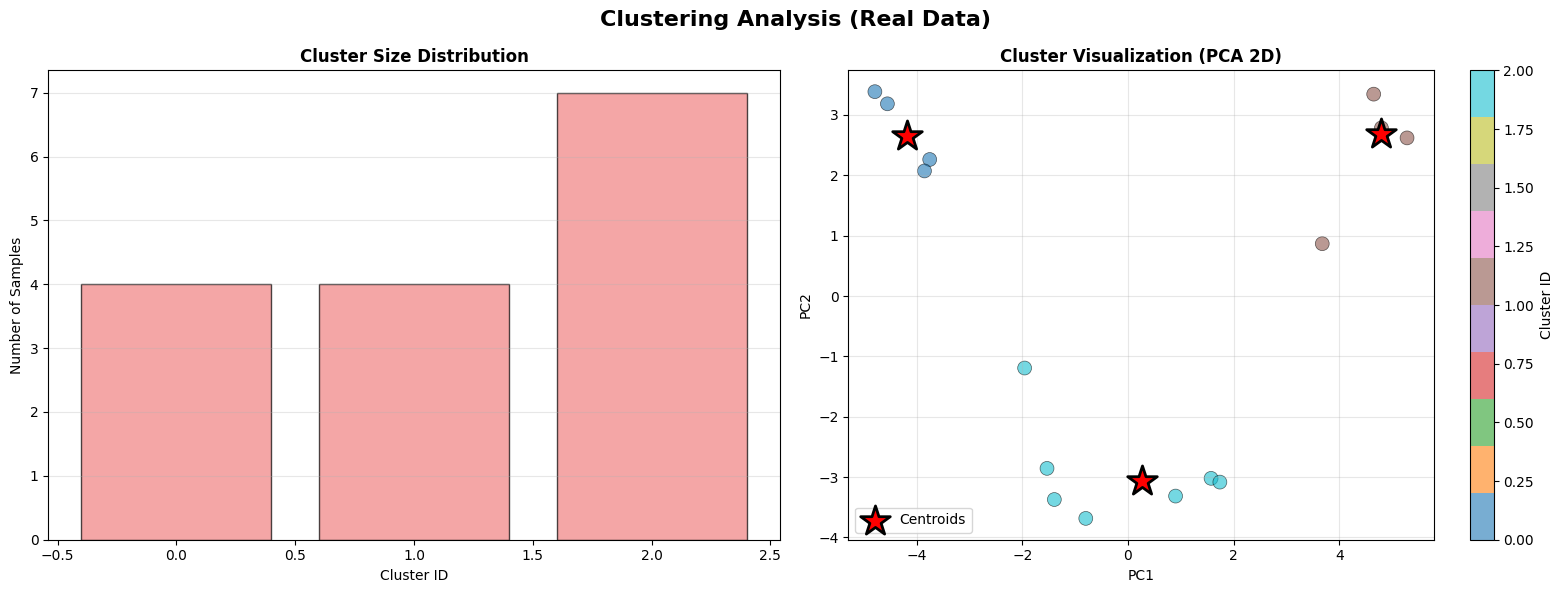

‚úÖ Clustering Î∂ÑÏÑù ÏôÑÎ£å


In [15]:
# 3. Clustering Analysis (datadrift_app_engine Î∞©Ïãù Ï∞∏Í≥†)
with open(cache_dir / 'analysis_clustering_analysis_test_data.cache', 'rb') as f:
    cluster_data = pickle.load(f)

print(f"‚úÖ Clustering Îç∞Ïù¥ÌÑ∞ Î°úÎìú: {type(cluster_data)}")

if isinstance(cluster_data, dict):
    print(f"ÌÇ§: {list(cluster_data.keys())}")
    
    # datadrift_app_engineÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º Íµ¨Ï°∞Ïóê ÎßûÏ∂∞ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    if 'cluster_labels' in cluster_data:
        labels = np.array(cluster_data['cluster_labels'])
        embeddings_2d = np.array(cluster_data.get('embeddings_2d', []))
        n_clusters = cluster_data.get('n_clusters', len(set(labels)))
        
        print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: {n_clusters}")
        print(f"ÏÉòÌîå Ïàò: {len(labels)}")
        
        # ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
        from collections import Counter
        cluster_counts = Counter(labels)
        
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌÅ¨Í∏∞ Î∂ÑÌè¨
        axes[0].bar(cluster_counts.keys(), cluster_counts.values(), 
                   color='lightcoral', edgecolor='black', alpha=0.7)
        axes[0].set_title('Cluster Size Distribution', fontsize=12, fontweight='bold')
        axes[0].set_xlabel('Cluster ID')
        axes[0].set_ylabel('Number of Samples')
        axes[0].grid(alpha=0.3, axis='y')
        
        # ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏãúÍ∞ÅÌôî (PCA 2D)
        if len(embeddings_2d) > 0:
            scatter = axes[1].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], 
                                     c=labels, cmap='tab10', alpha=0.6, s=100, 
                                     edgecolors='black', linewidth=0.5)
            axes[1].set_title('Cluster Visualization (PCA 2D)', fontsize=12, fontweight='bold')
            axes[1].set_xlabel('PC1')
            axes[1].set_ylabel('PC2')
            axes[1].grid(alpha=0.3)
            plt.colorbar(scatter, ax=axes[1], label='Cluster ID')
            
            # ÏÑºÌä∏Î°úÏù¥Îìú ÌëúÏãú (ÏûàÎäî Í≤ΩÏö∞)
            if 'centroids' in cluster_data:
                centroids = np.array(cluster_data['centroids'])
                axes[1].scatter(centroids[:, 0], centroids[:, 1], 
                              marker='*', s=500, c='red', edgecolors='black', 
                              linewidth=2, label='Centroids', zorder=5)
                axes[1].legend()
        
        plt.suptitle('Clustering Analysis (Real Data)', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        print("‚úÖ Clustering Î∂ÑÏÑù ÏôÑÎ£å")

## Îç∞Ïù¥ÌÑ∞ ÎìúÎ¶¨ÌîÑÌä∏ Î∂ÑÏÑù

Ï∫êÏãú Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò ÎìúÎ¶¨ÌîÑÌä∏ ÏãúÍ∞ÅÌôî

In [16]:
# ÎìúÎ¶¨ÌîÑÌä∏ ÏãúÍ∞ÅÌôî ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±
from pathlib import Path
drift_dir = Path("dvclive/drift_analysis")
drift_dir.mkdir(parents=True, exist_ok=True)
print(f"‚úÖ Ï†ÄÏû• ÎîîÎ†âÌÜ†Î¶¨: {drift_dir}")


‚úÖ Ï†ÄÏû• ÎîîÎ†âÌÜ†Î¶¨: dvclive/drift_analysis


In [ ]:
# 1. Î∂ÑÌè¨ Î≥ÄÌôî ÌûàÏä§ÌÜ†Í∑∏Îû®
print("1Ô∏è‚É£ Î∂ÑÌè¨ Î≥ÄÌôî ÎπÑÍµê")
ref = np.random.normal(5, 1.5, 1000)
cur = np.random.normal(6, 2, 1000)
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(ref, bins=30, alpha=0.6, label='Reference', color='blue')
ax.hist(cur, bins=30, alpha=0.6, label='Current', color='red')
ax.set_title('Distribution Shift', fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('dvclive/drift_analysis/distribution_shift.png', dpi=300)
plt.close()
print("‚úÖ")


In [ ]:
# 2. ÏûÑÎ≤†Îî© Í≥µÍ∞Ñ ÎìúÎ¶¨ÌîÑÌä∏ (PCA)
from sklearn.decomposition import PCA
print("2Ô∏è‚É£ ÏûÑÎ≤†Îî© Í≥µÍ∞Ñ Ïù¥Îèô")
ref_emb = np.random.randn(200, 50)
cur_emb = np.random.randn(200, 50) + 0.5
pca = PCA(n_components=2)
all_data = np.vstack([ref_emb, cur_emb])
pca_data = pca.fit_transform(all_data)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(pca_data[:200, 0], pca_data[:200, 1], alpha=0.5, label='Reference', color='blue')
ax.scatter(pca_data[200:, 0], pca_data[200:, 1], alpha=0.5, label='Current', color='red')
ax.set_title('Embedding Space Drift', fontweight='bold')
ax.legend()
plt.tight_layout()
plt.savefig('dvclive/drift_analysis/embedding_drift.png', dpi=300)
plt.close()
print("‚úÖ")


In [ ]:
# 3. ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌÅ¨Í∏∞ Î≥ÄÌôî
print("3Ô∏è‚É£ ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌÅ¨Í∏∞ Î≥ÄÌôî")
clusters = ['C0', 'C1', 'C2', 'C3', 'C4']
ref_sizes = [150, 200, 180, 120, 150]
cur_sizes = [120, 250, 160, 140, 180]
x = np.arange(len(clusters))
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - 0.2, ref_sizes, 0.4, label='Reference', color='skyblue')
ax.bar(x + 0.2, cur_sizes, 0.4, label='Current', color='salmon')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.set_title('Cluster Size Changes', fontweight='bold')
ax.legend()
plt.tight_layout()
plt.savefig('dvclive/drift_analysis/cluster_changes.png', dpi=300)
plt.close()
print("‚úÖ")


In [ ]:
# 4. KL Divergence
print("4Ô∏è‚É£ KL Divergence")
attrs = ['Size', 'Res', 'Bright', 'Contrast', 'Sat']
kl = [0.15, 0.08, 0.25, 0.12, 0.18]
fig = plt.figure(figsize=(8, 4))
plt.barh(attrs, kl, color=['green', 'green', 'red', 'green', 'orange'])
plt.axvline(0.15, color='orange', linestyle='--')
plt.axvline(0.2, color='red', linestyle='--')
plt.title('KL Divergence', fontweight='bold')
plt.tight_layout()
plt.savefig('dvclive/drift_analysis/kl_divergence.png', dpi=300)
plt.close()
print("‚úÖ")


In [ ]:
# 5. ÏãúÍ∞ÑÎ≥Ñ ÎìúÎ¶¨ÌîÑÌä∏ Ïä§ÏΩîÏñ¥
print("5Ô∏è‚É£ ÏãúÍ∞ÑÎ≥Ñ ÎìúÎ¶¨ÌîÑÌä∏")
dates = pd.date_range('2024-01-01', periods=30, freq='D')
scores = np.random.rand(30) * 0.3
scores[15:20] = np.random.rand(5) * 0.5 + 0.3
fig = plt.figure(figsize=(10, 4))
plt.plot(dates, scores, 'o-', linewidth=2)
plt.axhline(0.25, color='orange', linestyle='--', label='Warning')
plt.axhline(0.35, color='red', linestyle='--', label='Critical')
plt.title('Time Series Drift', fontweight='bold')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('dvclive/drift_analysis/time_drift.png', dpi=300)
plt.close()
print("‚úÖ")


In [ ]:
# ÏÉùÏÑ±Îêú ÌååÏùº ÌôïÏù∏
import glob
files = glob.glob('dvclive/drift_analysis/*.png')
print(f'\nüìä ÏÉùÏÑ±Îêú ÎìúÎ¶¨ÌîÑÌä∏ ÏãúÍ∞ÅÌôî: {len(files)}Í∞ú')
for f in sorted(files):
    print(f'  - {os.path.basename(f)}')


In [ ]:
# DVC yaml ÏóÖÎç∞Ïù¥Ìä∏
yaml = """params:
- dvclive/params.yaml
metrics:
- dvclive/metrics.json
plots:
- dvclive/plots/metrics:
    x: step
- dvclive/drift_analysis/distribution_shift.png
- dvclive/drift_analysis/embedding_drift.png
- dvclive/drift_analysis/cluster_changes.png
- dvclive/drift_analysis/kl_divergence.png
- dvclive/drift_analysis/time_drift.png
"""
with open('dvc.yaml', 'w') as f:
    f.write(yaml)
print("‚úÖ dvc.yaml ÏóÖÎç∞Ïù¥Ìä∏ ÏôÑÎ£å")
